In [1]:
import xarray as xr
from dask.distributed import Client
import matplotlib.pyplot as plt
import cmocean as cm
import cftime
import os
import numpy as np

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml


In [2]:
client = Client(threads_per_worker=1)
print(client.dashboard_link)

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that i

/proxy/8787/status


In [53]:
# Adaptive:
ag_dirname = '/g/data/x77/ahg157/access-om3/om3-25km-ag-536027c3/'
# HYCOM1
h1_dirname = '/g/data/x77/ahg157/access-om3/om3-25km-hycom1-fa7a9287/'

In [54]:
thkcello_fname = ag_dirname+'output000/access-om3.mom6.3d.thkcello.1day.mean.1900.nc'
ag_thkcello = xr.open_dataset(thkcello_fname)
rhopot2_fname = ag_dirname+'output000/access-om3.mom6.3d.rhopot2.1day.mean.1900.nc'
ag_rhopot2 = xr.open_dataset(rhopot2_fname)
thkcello_fname = h1_dirname+'output000/access-om3.mom6.3d.thkcello.1day.mean.1900.nc'
h1_thkcello = xr.open_dataset(thkcello_fname)
rhopot2_fname = h1_dirname+'output000/access-om3.mom6.3d.rhopot2.1day.mean.1900.nc'
h1_rhopot2 = xr.open_dataset(rhopot2_fname)

/jobfs/153740878.gadi-pbs/ipykernel_2457825/48073408.py:2: FutureWarning: In a future version, xarray will not decode the variable 'average_DT' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ag_thkcello = xr.open_dataset(thkcello_fname)
/jobfs/153740878.gadi-pbs/ipykernel_2457825/48073408.py:4: FutureWarning: In a future version, xarray will not decode the variable 'average_DT' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xar

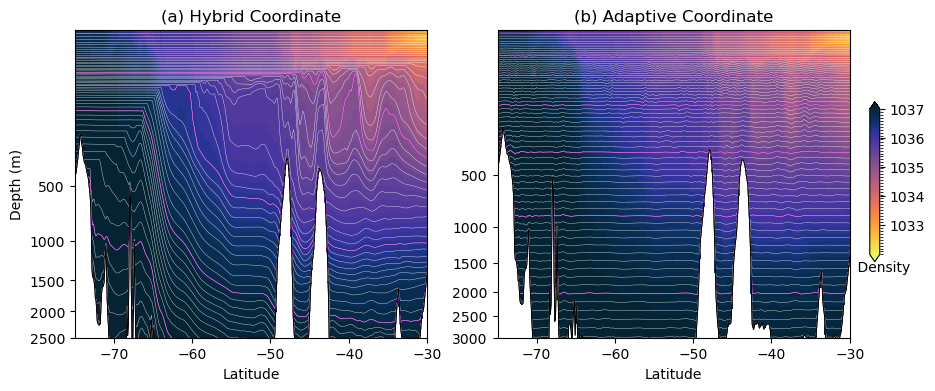

In [93]:
plt.figure(figsize=(10,4))
#AG
thkslice = ag_thkcello.isel(time=-1).sel(xh=-180,method='nearest')
rhoslice = ag_rhopot2.isel(time=-1).sel(xh=-180,method='nearest')
layerdepth = thkslice.thkcello.cumsum('zl')
rhonew = xr.DataArray(data=rhoslice.rhopot2.values,dims=["zl", "yh"],
            coords=dict(yh=(["yh"], rhoslice.yh.values),depth=(["zl", "yh"], layerdepth.values))) 

plt.subplot(122)
rhonew.plot(y = "depth",add_colorbar=False,levels=np.linspace(1032,1037),cmap=cm.cm.thermal_r)
for ii in range(75):
    if np.mod(ii,10)==5:
        layerdepth.isel(zl=ii).plot(color='m',linewidth=0.6)
    if ii>72:
        layerdepth.isel(zl=ii).plot(color='k',linewidth=0.6)
    else:
        layerdepth.isel(zl=ii).plot(color='w',linewidth=0.25)

def forward(x):
    return x**(1/3)
def inverse(x):
    return x**3

plt.xlim([-75,-30])
plt.ylim([10,3000])    
plt.gca().set_yscale('function', functions=(forward, inverse))
plt.gca().invert_yaxis()

plt.title('(b) Adaptive Coordinate')
plt.ylabel('')
plt.xlabel('Latitude')

#HYCOM1
thkslice = h1_thkcello.isel(time=-1).sel(xh=-180,method='nearest')
rhoslice = h1_rhopot2.isel(time=-1).sel(xh=-180,method='nearest')
layerdepth = thkslice.thkcello.cumsum('zl')
rhonew = xr.DataArray(data=rhoslice.rhopot2.values,dims=["zl", "yh"],
            coords=dict(yh=(["yh"], rhoslice.yh.values),depth=(["zl", "yh"], layerdepth.values))) 

plt.subplot(121)
p1=rhonew.plot(y = "depth",add_colorbar=False,levels=np.linspace(1032,1037),cmap=cm.cm.thermal_r)
for ii in range(75):
    if np.mod(ii,10)==5:
        layerdepth.isel(zl=ii).plot(color='m',linewidth=0.6)
    if ii>72:
        layerdepth.isel(zl=ii).plot(color='k',linewidth=0.6)
    else:
        layerdepth.isel(zl=ii).plot(color='w',linewidth=0.25)

plt.xlim([-75,-30])
plt.ylim([10,2500])    
plt.gca().set_yscale('function', functions=(forward, inverse))
plt.gca().invert_yaxis()

plt.title('(a) Hybrid Coordinate')
plt.ylabel('Depth (m)')
plt.xlabel('Latitude')

ax_c = plt.axes([0.92,0.3,0.01,0.4])
pc = plt.colorbar(p1,ax_c,ticks=[1037,1036,1035,1034,1033])
plt.xlabel('    Density')

plt.savefig('AG_Test.png',dpi=400)